vastav


# Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data= pd.read_csv('pokemon_alopez247.csv')
data

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,NaN,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680.0,126.0,131.0,95.0,131.0,98.0,99.0,6,True,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600.0,108.0,100.0,121.0,81.0,95.0,95.0,6,True,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600.0,50.0,100.0,150.0,100.0,150.0,50.0,6,True,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600.0,80.0,110.0,60.0,150.0,130.0,70.0,6,True,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


# Visual Presentation of the dataset missing values and target column

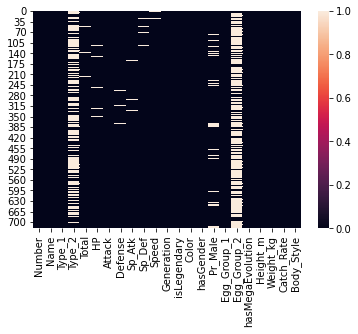

In [ ]:
import seaborn as sn
sn.heatmap(data.isnull())

Our Target Column is Type 1

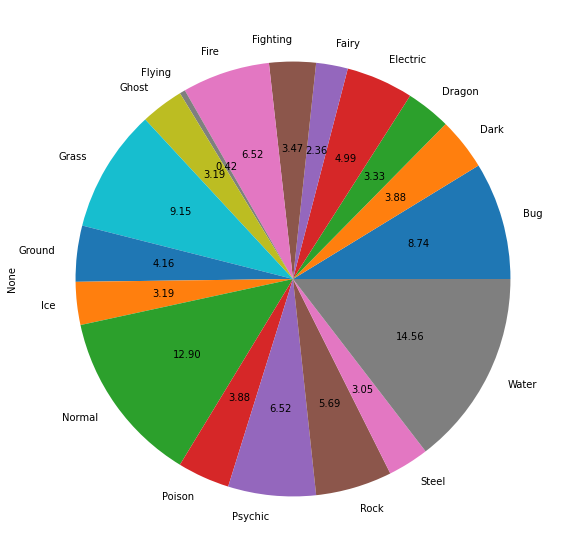

In [ ]:
data.groupby('Type_1').size().plot(kind='pie', autopct='%.2f',figsize=(10, 10))

# Required processing

There are 721 unique values in Number

In [ ]:
data=data.drop('Number',axis=1)
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,NaN,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


Replacing the String Column Type_2 and Egg_Group_2 with 'NO' because its an additional feature of pokemon

In [ ]:
data['Type_2']=data['Type_2'].replace(np.nan, 'NO')
data['Egg_Group_2']=data['Egg_Group_2'].replace(np.nan, 'NO')

In [ ]:
for c in data.columns:

  print(data[c].value_counts().to_frame())
   

           Name
Bunnelby      1
Nincada       1
Regigigas     1
Poliwrath     1
Bonsly        1
...         ...
Ninetales     1
Nidorino      1
Empoleon      1
Mawile        1
Venomoth      1

[721 rows x 1 columns]
          Type_1
Water        105
Normal        93
Grass         66
Bug           63
Fire          47
Psychic       47
Rock          41
Electric      36
Ground        30
Dark          28
Poison        28
Fighting      25
Dragon        24
Ice           23
Ghost         23
Steel         22
Fairy         17
Flying         3
          Type_2
NO           371
Flying        87
Poison        31
Ground        30
Psychic       27
Steel         19
Fighting      19
Grass         18
Fairy         18
Dark          16
Rock          14
Dragon        14
Water         13
Ghost         12
Ice           10
Fire           9
Electric       6
Normal         4
Bug            3
       Total
600.0     26
405.0     25
500.0     23
300.0     19
580.0     18
...      ...
253.0      1
273.0      1
215.

In [ ]:
data.isnull().any()

Name                False
Type_1              False
Type_2              False
Total                True
HP                   True
Attack               True
Defense              True
Sp_Atk               True
Sp_Def               True
Speed                True
Generation          False
isLegendary         False
Color               False
hasGender           False
Pr_Male              True
Egg_Group_1         False
Egg_Group_2         False
hasMegaEvolution    False
Height_m            False
Weight_kg           False
Catch_Rate          False
Body_Style          False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              721 non-null    object 
 1   Type_1            721 non-null    object 
 2   Type_2            721 non-null    object 
 3   Total             708 non-null    float64
 4   HP                710 non-null    float64
 5   Attack            714 non-null    float64
 6   Defense           715 non-null    float64
 7   Sp_Atk            712 non-null    float64
 8   Sp_Def            715 non-null    float64
 9   Speed             715 non-null    float64
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           644 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  Egg_Group_2       721 non-null    object 
 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['Type_1']=l.fit_transform(data['Type_1'])
data['Type_2']=l.fit_transform(data['Type_2'])
data['Color']=l.fit_transform(data['Color'])
data['Egg_Group_1']=l.fit_transform(data['Egg_Group_1'])
data['Egg_Group_2']=l.fit_transform(data['Egg_Group_2'])
data['Body_Style']=l.fit_transform(data['Body_Style'])

In [ ]:
#Outliers
from sklearn.cluster import DBSCAN
data1=data.drop('Name',axis=1)
data2=data1.dropna(axis=0)
outlier_detection = DBSCAN(min_samples = 2, eps = 10)
clusters = outlier_detection.fit_predict(data2)
list(clusters).count(-1)

586

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,9,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False,3,True,0.875,10,Grass,False,0.71,6.9,45,9
1,Ivysaur,9,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False,3,True,0.875,10,Grass,False,0.99,13.0,45,9
2,Venusaur,9,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False,3,True,0.875,10,Grass,True,2.01,100.0,45,9
5,Charizard,6,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0,1,False,7,True,0.875,10,Dragon,True,1.70,90.5,45,0
33,Nidoking,13,Ground,505.0,81.0,102.0,77.0,85.0,75.0,85.0,1,False,6,True,1.000,10,Field,False,1.40,62.0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Tyrunt,15,Dragon,362.0,58.0,89.0,77.0,45.0,45.0,48.0,6,False,2,True,0.875,10,Dragon,False,0.79,26.0,45,0
696,Tyrantrum,15,Dragon,521.0,82.0,121.0,119.0,69.0,59.0,71.0,6,False,7,True,0.875,10,Dragon,False,2.49,270.0,45,0
701,Dedenne,3,Fairy,431.0,67.0,58.0,57.0,81.0,67.0,101.0,6,False,9,True,0.500,5,Fairy,False,0.20,2.2,180,0
707,Phantump,8,Grass,309.0,43.0,70.0,48.0,50.0,60.0,38.0,6,False,2,True,0.500,7,Amorphous,False,0.41,7.0,120,3


In [ ]:
y=data['Type_1']
y.value_counts()

17    91
12    75
9     62
0     54
6     38
14    33
15    29
13    27
3     26
1     25
10    24
5     24
8     22
11    18
2     18
4     16
16     9
7      3
Name: Type_1, dtype: int64

In [ ]:
x=data.drop('Type_1',axis=1)

In [ ]:
x=x.drop('Name',axis=1)

In [ ]:
x.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000000,0.159913,0.104013,0.138516,0.122581,0.118034,0.104145,0.028079,0.983329,0.135022,-0.100328,-0.013414,-0.117981,-0.009710,0.087309,-0.074931
Total,0.159913,1.000000,0.679304,0.714060,0.616572,0.720548,0.703821,0.550127,0.091380,0.484382,-0.387733,0.118846,0.229240,0.527875,0.537969,-0.737359
HP,0.104013,0.679304,1.000000,0.474110,0.236406,0.363645,0.371952,0.166401,0.068071,0.258656,-0.153985,-0.066778,0.093401,0.474400,0.435076,-0.480406
Attack,0.138516,0.714060,0.474110,1.000000,0.435464,0.329521,0.210927,0.337372,0.093458,0.305027,-0.198149,0.202639,0.205228,0.440361,0.476368,-0.529974
Defense,0.122581,0.616572,0.236406,0.435464,1.000000,0.195518,0.495199,-0.005852,0.070009,0.277587,-0.265320,0.064833,0.114227,0.355719,0.472138,-0.435515
Sp_Atk,0.118034,0.720548,0.363645,0.329521,0.195518,1.000000,0.487370,0.437105,0.068902,0.411746,-0.337784,0.111260,0.169360,0.327324,0.282945,-0.534495
Sp_Def,0.104145,0.703821,0.371952,0.210927,0.495199,0.487370,1.000000,0.227836,0.047300,0.360238,-0.336721,0.016218,0.148847,0.311603,0.327419,-0.510006
Speed,0.028079,0.550127,0.166401,0.337372,-0.005852,0.437105,0.227836,1.000000,0.004015,0.286944,-0.217670,0.074872,0.144697,0.222808,0.109462,-0.408664
Generation,0.983329,0.091380,0.068071,0.093458,0.070009,0.068902,0.047300,0.004015,1.000000,0.071875,-0.029916,0.010912,-0.125374,-0.051304,0.034003,-0.025227
isLegendary,0.135022,0.484382,0.258656,0.305027,0.277587,0.411746,0.360238,0.286944,0.071875,1.000000,-0.644714,0.095428,0.047955,0.326323,0.425219,-0.319302


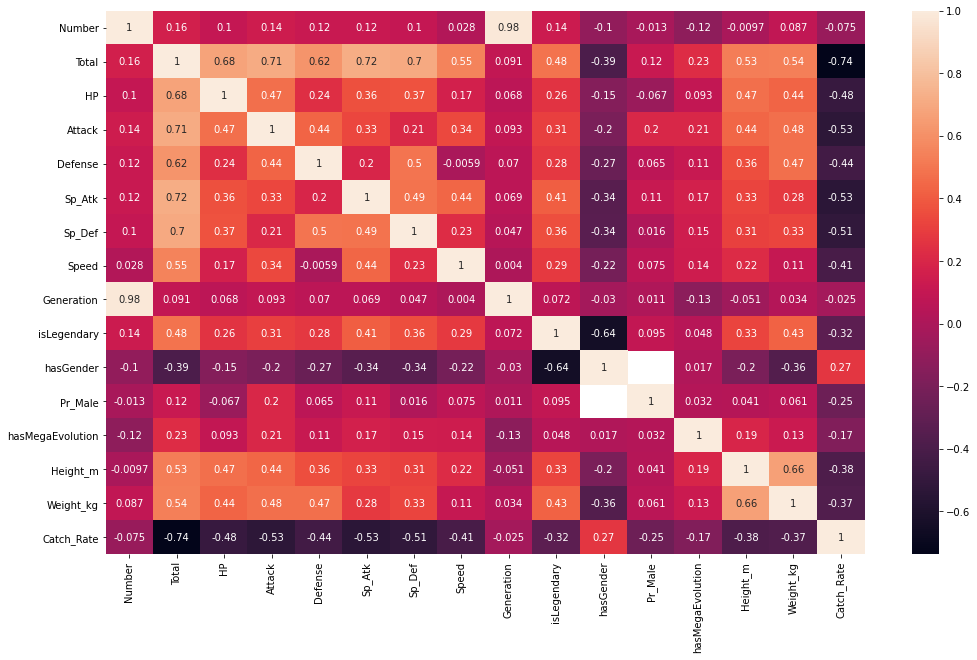

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,10))
corr = data.corr()
sn.heatmap(corr, annot = True)

In [ ]:
x=x.values

# Before Pre processing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=0)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.15


## SVM

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.35


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DT = DecisionTreeClassifier(random_state=0)
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(random_state=0)
RF = RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
clf = GradientBoostingClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6166666666666667


## XGB Boost

In [ ]:
import xgboost as xgb
from sklearn import metrics
clf = xgb.XGBClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf=bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5666666666666667


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier()
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31666666666666665


## Ada Boost + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


## Naive Bayes Guassian Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18333333333333332


## Naive Bayes Multinomial Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2


## Single Classifier

In [ ]:
RF=RandomForestClassifier()
Abc=AdaBoostClassifier(base_estimator=RF)     #ada
bag_clf=BaggingClassifier(base_estimator=Abc)  #bagging
bag_clf.fit(x_train, y_train)
y_pred=bag_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5333333333333333


## Meta Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(random_state=0)
LR.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
meta=StackingClassifier(classifiers=[DT,RF],meta_classifier=LR)
meta.fit(x_train, y_train)
y_pred=meta.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Filling missing Values

In [ ]:
datacopy=data

In [ ]:
da=datacopy
da.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,9,14,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False,3,True,0.875,10,6,False,0.71,6.9,45,9
1,Ivysaur,9,14,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False,3,True,0.875,10,6,False,0.99,13.0,45,9
2,Venusaur,9,14,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False,3,True,0.875,10,6,True,2.01,100.0,45,9
3,Charmander,6,12,309.0,39.0,52.0,43.0,60.0,50.0,NaN,1,False,7,True,0.875,10,2,False,0.61,8.5,45,0
4,Charmeleon,6,12,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1,False,7,True,0.875,10,2,False,1.09,19.0,45,0


## 1) Mean

In [ ]:
da['Total']=da['Total'].fillna(value=da['Total'].mean())
da['HP']=da['HP'].fillna(value=da['HP'].mean())
da['Attack']=da['Attack'].fillna(value=da['Attack'].mean())
da['Defense']=da['Defense'].fillna(value=da['Defense'].mean())
da['Sp_Atk']=da['Sp_Atk'].fillna(value=da['Sp_Atk'].mean())
da['Sp_Def']=da['Sp_Def'].fillna(value=da['Sp_Def'].mean())
da['Speed']=da['Speed'].fillna(value=da['Speed'].mean())
da['Pr_Male']=da['Pr_Male'].fillna(value=da['Pr_Male'].mean())

In [ ]:
ym=da['Type_1']

In [ ]:
ym=ym.values

In [ ]:
xm=da.drop('Type_1',axis=1)

In [ ]:
xm=xm.drop('Name',axis=1)

In [ ]:
xm=xm.values

## 2) KNN_Imputer

In [ ]:
da=da.drop('Name',axis=1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
da=imputer.fit_transform(da)

## 3) Interpolation

In [ ]:
data=data.interpolate(method ='linear', limit_direction ='forward')

## 4) Replace with 0

In [ ]:
data=data.replace(np.nan,0)

# Pre processing Techniques

In [ ]:
data.isnull().sum()

Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

## 1) Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xm =scaler.fit_transform(xm)


In [ ]:
xm

array([[ 0.91803069, -0.92136404, -0.91325774, ..., -0.56016184,
        -0.72198897,  0.82357348],
       [ 0.91803069, -0.12231667, -0.33053682, ..., -0.49164858,
        -0.72198897,  0.82357348],
       [ 0.91803069,  0.97981763,  0.44642441, ...,  0.48550776,
        -0.72198897,  0.82357348],
       ...,
       [-1.82844287,  1.66865157, -0.71901743, ..., -0.53882164,
        -1.27086227, -0.50532577],
       [-0.72985345,  1.66865157,  0.44642441, ..., -0.53657531,
        -1.27086227,  0.15912386],
       [ 2.01662012,  1.66865157,  0.44642441, ...,  1.55251756,
        -1.27086227,  0.82357348]])

In [ ]:
ym

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

## 2) Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xms =scaler.fit_transform(xm)


## 3) Label Encoding

In [ ]:
data['Type_1']=l.fit_transform(data['Type_1'])
data['Type_2']=l.fit_transform(data['Type_2'])
data['Color']=l.fit_transform(data['Color'])
data['Egg_Group_1']=l.fit_transform(data['Egg_Group_1'])
data['Egg_Group_2']=l.fit_transform(data['Egg_Group_2'])
data['Body_Style']=l.fit_transform(data['Body_Style'])

## 4) Base N Encoding

In [ ]:
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=[],return_df=True,base=3)
data=encoder.fit_transform(data)

# After Pre processing

In [ ]:
yprep=da['Type_1']

In [ ]:
yprep=yprep.values
yprep

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

In [ ]:
xprep=da.drop('Type_1',axis=1)
xprep=da.drop('Name',axis=1)
xprep

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,14,318.000000,45.0,49.0,49.0,65.0,65.0,45.000000,1,False,3,True,0.875000,10,6,False,0.71,6.9,45,9
1,9,14,405.000000,60.0,62.0,63.0,80.0,80.0,60.000000,1,False,3,True,0.875000,10,6,False,0.99,13.0,45,9
2,9,14,525.000000,80.0,82.0,83.0,100.0,100.0,80.000000,1,False,3,True,0.875000,10,6,True,2.01,100.0,45,9
3,6,12,309.000000,39.0,52.0,43.0,60.0,50.0,65.713287,1,False,7,True,0.875000,10,2,False,0.61,8.5,45,0
4,6,12,418.317797,58.0,64.0,58.0,80.0,65.0,80.000000,1,False,7,True,0.875000,10,2,False,1.09,19.0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,1,7,680.000000,126.0,131.0,95.0,131.0,98.0,99.000000,6,True,7,False,0.553377,11,10,False,5.79,203.0,45,12
717,2,10,600.000000,108.0,100.0,121.0,81.0,95.0,95.000000,6,True,3,False,0.553377,11,10,False,5.00,305.0,3,10
718,15,4,600.000000,50.0,100.0,150.0,100.0,150.0,50.000000,6,True,5,False,0.553377,11,10,True,0.71,8.8,3,3
719,14,8,600.000000,80.0,110.0,60.0,150.0,130.0,70.000000,6,True,6,False,0.553377,11,10,False,0.51,9.0,3,6


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xprep,yprep,test_size=0.20,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xms,ym,test_size=0.20,random_state=42)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
KNN= KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.20689655172413793


## SVM

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8482758620689655


## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DT = DecisionTreeClassifier()
DT = DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993103448275862


## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(random_state=0)
RF = RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8482758620689655


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
clf = GradientBoostingClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993103448275862


## XGB Boost

In [ ]:
import xgboost as xgb
from sklearn import metrics
clf = xgb.XGBClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993103448275862


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf=bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993103448275862


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abc = AdaBoostClassifier()
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6758620689655173


## Ada Boost + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8551724137931035


## Naive Bayes Guassian Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993103448275862


## Naive Bayes Multinomial Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0896551724137931


## Single Classifier

In [ ]:
RF=RandomForestClassifier()
Abc=AdaBoostClassifier(base_estimator=RF)     #ada
bag_clf=BaggingClassifier(base_estimator=Abc)  #bagging
bag_clf.fit(x_train, y_train)
y_pred=bag_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8482758620689655


## Meta Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(random_state=0)
LR.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
meta=StackingClassifier(classifiers=[DT,RF],meta_classifier=LR)
meta.fit(x_train, y_train)
y_pred=meta.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6275862068965518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,NaN,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,NaN,58.0,64.0,58.0,80.0,65.0,80.0,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


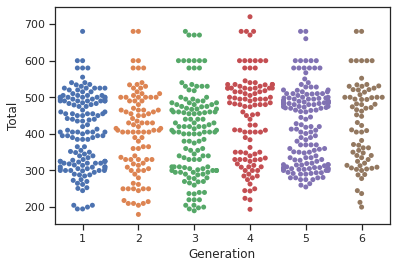

In [ ]:
sns.swarmplot(x="Generation", y="Total", data=data)

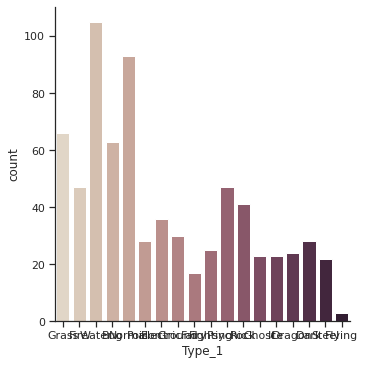

In [ ]:
sns.catplot(x="Type_1", kind="count", palette="ch:.25", data=data)

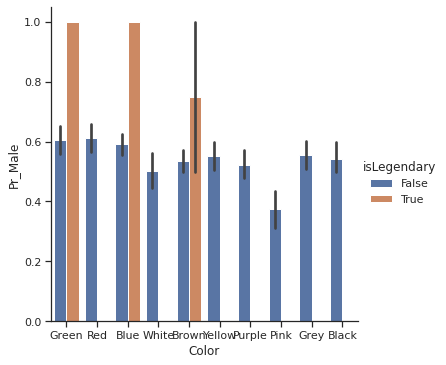

In [ ]:
sns.catplot(x="Color", y="Pr_Male", hue="isLegendary", kind="bar", data=data)